Ανέβασμα Βασης Δεδομένων

In [1]:
#upload of data
from google.colab import files 
uploaded = files.upload()

Saving qm_moto1.csv to qm_moto1.csv


Εισάγονται οι απαραίτητες βιβλιοθήκες

In [152]:
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt

Διαβάζουμε το αρχείο CSV και αποθηκεύουμε τα δεδομένα σε ένα DataFrame με το όνομα "data". Εκτυπώνονται οι πρώτες 5 γραμμές του Dataframe. Κρατάμε στην Βαση Δεδομένων, μόνο τις στήλες 'dif', 'distancexy', 'd3', 'platoon', 'over' που θα χρησιμοποιηθούν στην Λογιστική Παλινδρόμηση

In [143]:
#Δημιουργία pandas dataframe
data = pd.read_csv('qm_moto1.csv', delimiter=';')
data= data[['dif','distancexy','d3','lane','platoon','Veh_ Type1','Veh_ TypeM','over']].copy()
data['dif'] = pd.to_numeric(data.dif, downcast='float')


data = pd.get_dummies(data, columns=['Veh_ TypeM', 'platoon','Veh_ Type1','lane'], drop_first=True)


data.head()
#data.dtypes


,dif,distancexy,d3,over,Veh_ TypeM_1,platoon_1,Veh_ Type1_2,Veh_ Type1_3,Veh_ Type1_4,lane_1
0,2.0,5.2,1.7,0,0,0,1,0,0,0
1,-6.0,6.6,1.7,0,0,0,1,0,0,1
2,-1.0,7.9,1.6,0,0,0,0,0,0,1
3,26.0,12.6,1.6,1,1,0,0,0,0,1
4,21.0,6.4,255.0,1,0,0,0,0,0,1


Υπολογίζεται τα εκατοστημόρια (25%, 50% (διάμεσος), 75%), αριθμητικός μέσος, ελάχιστη-μέγιστη τιμή και τυπική απόκλιση των μεταβλητών που θα χρημοποιηθούν στην Λογιστική Παλινδρόμηση μέσω της εντολής describe() 

In [144]:
#Στατιστικά στοιχεία μεταβλητών
data.describe()

,dif,distancexy,d3,over,Veh_ TypeM_1,platoon_1,Veh_ Type1_2,Veh_ Type1_3,Veh_ Type1_4,lane_1
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,16.312124,6.800000,71.154382,0.630252,0.386555,0.120048,0.224490,0.028812,0.075630,0.529412
std,14.476556,3.797016,112.996394,0.483026,0.487253,0.325213,0.417497,0.167377,0.264564,0.499434
min,-25.000000,1.200000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,3.900000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,5.800000,1.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,25.000000,9.000000,255.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,82.000000,31.700000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Δημιουργία πίνακα ενδεχομένων δύο κατευθύνσεων μεταξύ της εξαρτημένης ('over') και ανεξάρτητης ('platoon') κατηγορικής μεταβλητής 

In [145]:
#Δημιουργία πίνακα ενδεχομένων δύο κατευθύνσεων
contingency_table = pd.crosstab(data['platoon_1'], data['over'])
print(contingency_table)

over         0    1
platoon_1          
0          265  468
1           43   57


Δημιουργία προτύπου Λογιστικής Παλινδρόμησης

In [146]:
#Ορισμός εξαρτημένης μεταβλητής
y = data['over']

#Ορισμός ανεξάρτητων μεταβλητών
cols=['dif','distancexy','d3'] 
X=data[cols]

#X = data.drop(['over'], axis=1)
#Δημιουργία σταθερού όρου
X = sm.add_constant(X)

#Δημιουργία Λογιστικής Παλινδρόμησης και εκτύπωση αποτελεσμάτων
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.325498
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   over   No. Observations:                  833
Model:                          Logit   Df Residuals:                      829
Method:                           MLE   Df Model:                            3
Date:                Fri, 02 Jun 2023   Pseudo R-squ.:                  0.5059
Time:                        13:16:28   Log-Likelihood:                -271.14
converged:                       True   LL-Null:                       -548.80
Covariance Type:            nonrobust   LLR p-value:                4.894e-120
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4357      0.259     -1.681      0.093      -0.944       0.072
dif            0.2120      0.

Το πρότυπο Λογιστικής Παλινδρόμησης πέτυχε μια σχετικά χαμηλή τιμή της συνάρτησης logit 0,325201, γεγονός που υποδηλώνει καλή προσαρμογή μεταξύ των προβλεπόμενων πιθανοτήτων και των παρατηρούμενων δυαδικών αποτελεσμάτων.Το πρότυπο Λογιστικής παλινδρόμησης χρησιμοποιεί τέσσερις ανεξάρτητες μεταβλητές: "dif", "distancexy", "d3" και "platoon". Μεταξύ αυτών των μεταβλητών, η "dif" είχε την πιο ουσιαστική επίδραση στην εξαρτημένη μεταβλητή, όπως υποδεικνύεται από τον συντελεστή 0,2119 και τη τιμή p-value 0,000. Αυτό υποδηλώνει ότι όσο αυξάνεται η μεταβλητή "dif", αυξάνεται και η πιθανότητα της εξαρτημένης μεταβλητής "over". Ομοίως, η ανεξάρτητη μεταβλητή "distancexy" παρουσίασε αρνητική σχέση με την εξαρτημένη μεταβλητή, όπως φαίνεται από τον συντελεστή της -0,2826. Η μεταβλητή "d3" είχε επίσης μικρή θετική επίδραση, με συντελεστή 0,0041. Ωστόσο, η ανεξάρτητη μεταβλητή "platoon" δεν παρουσίασε σημαντική σχέση με την εξαρτημένη μεταβλητή, καθώς ο συντελεστής της -0,2317 είχε p-value 0,481, υποδηλώνοντας μη σημαντικότητα. Συνολικά, το μοντέλο έδωσε μια σχετικά υψηλή τιμή ψευδοτετραγώνου R 0,5064, υποδεικνύοντας ότι οι ανεξάρτητες μεταβλητές εξηγούν συλλογικά ένα σημαντικό μέρος της διακύμανσης της εξαρτημένης μεταβλητής.

Υπολογισμός στατιστικών υπολειμμάτων απόκλισης 

In [147]:
# Υπολογισμός πιθανοτήτων αποτελέσματος
predicted_probs = result.predict(X)

# Υπολογισμός υπολειμμάτων απόκλισης
deviance_resid = 2 * (y * np.log(predicted_probs / (1 - predicted_probs)) + (1 - y) * np.log((1 - predicted_probs) / predicted_probs))

# Υπολογισμός στατιστικών υπολειμμάτων απόκλισης 
deviance_resid_stats = np.percentile(deviance_resid, [0, 25, 50, 75, 100])
print("Στατιστικά υπολείμματα απόκλισης:")
print("Ελάχιστο:", deviance_resid_stats[0])
print("Εκατοστημόριο (25%):", deviance_resid_stats[1])
print("Διάμεσος: ", deviance_resid_stats[2])
print("Εκατοστημόριο (75%):", deviance_resid_stats[3])
print("Μέγιστο:", deviance_resid_stats[4])

Στατιστικά υπολείμματα απόκλισης:
Ελάχιστο: -14.515871256577991
Εκατοστημόριο (25%): 1.630921821490598
Διάμεσος:  4.453967154064639
Εκατοστημόριο (75%): 7.585085184590713
Μέγιστο: 29.581914147865128


Το ελάχιστο υπόλειμμα απόκλισης -14,4468 υποδηλώνει την παρουσία τουλάχιστον μίας παρατήρησης με σημαντικά χαμηλότερο παρατηρούμενο αποτέλεσμα από αυτό που προβλέπει το πρότυπο. Η τιμή του 1ου τεταρτημορίου 1,7053 υποδηλώνει ότι το ένα τέταρτο των υπολειμμάτων απόκλισης είναι κάτω από αυτή την τιμή, υποδηλώνοντας σχετικά καλή προσαρμογή για ένα μέρος των παρατηρήσεων.Επιπλέον, η τιμή του 3ου τεταρτημορίου 7,5272 υποδηλώνει ότι η πλειοψηφία των υπολειμμάτων απόκλισης είναι κάτω από αυτή την τιμή, υποδηλώνοντας επίσης σχετικά καλή προσαρμογή για τις περισσότερες παρατηρήσεις. Ωστόσο, το μέγιστο υπόλοιπο απόκλισης 29,1565 υποδεικνύει την παρουσία τουλάχιστον μιας παρατήρησης με σημαντικά υψηλότερο παρατηρούμενο αποτέλεσμα από το προβλεπόμενο. Συνολικά, το εύρος των υπολειμμάτων απόκλισης υποδηλώνει μεταβλητότητα στην ικανότητα του προτύπου να εξηγεί τα παρατηρούμενα αποτελέσματα.

In [148]:
# Calculate AIC
aic = result.aic
print("AIC:", round(aic,3))

AIC: 550.28


Η τιμή AIC, η οποία συνδυάζει την καλή προσαρμογή και την πολυπλοκότητα του προτύπου, υπολογίστηκε σε 551,784. Χαμηλότερη τιμή AIC υποδηλώνει ένα πρότυπο καλύτερης προσαρμογής με καλή ισορροπία μεταξύ της προσαρμογής του προτύπου και της απλότητας. Αυτή η τιμή AIC υποδεικνύει ότι το τρέχον πρότυπο λογιστικής παλινδρόμησης είναι σχετικά ικανοποιητικό όσον αφορά τόσο την προβλεπτική του ικανότητα όσο και τον αριθμό των εμπλεκόμενων παραμέτρων.

Υπολογισμός των odds-ratios και των αντίστοιχων διαστημάτων εμπιστοσύνης

In [149]:
# Εξάγουμε τους συντελεστές και τα τυπικά σφάλματα
coef = result.params
std_err = result.bse

# Εκθετικοποιούμε τους συντελεστές
odds_ratios = np.exp(coef)

# Υπολογισμός του ανώτερου και κατώτερου ορίου με 95% διάστημα εμπιστοσύνης
ci_lower = np.exp(coef - 1.96 * std_err)
ci_upper = np.exp(coef + 1.96 * std_err)

# Εκτύπωση αποτελεσμάτων
print("               OR     2.5%  97.5%")
for i in range(len(coef)):
    predictor_variable = result.params.index[i]
    odds_ratio = odds_ratios[i]
    lower_bound = ci_lower[i]
    upper_bound = ci_upper[i]
    print(f"{predictor_variable:<12} {odds_ratio:.4f} {lower_bound:.5f} {upper_bound:.3f}")

               OR     2.5%  97.5%
const        0.6468 0.38916 1.075
dif          1.2361 1.19803 1.275
distancexy   0.7533 0.70686 0.803
d3           1.0041 1.00204 1.006


Με βάση τα παραπάνω αποτελέσματα μπορούμε να πούμε ότι για μια αύξηση του dif κατά μία μονάδα, οι πιθανότητες να γίνει προσπέραση (σε σχέση με το να μην γίνει) αυξάνονται κατά 1,23 φορές. Επιπλέον, ενα ευρύτερο διάστημα εμπιστοσύνης υποδηλώνει μεγαλύτερη αβεβαιότητα, ενώ ένα στενότερο διάστημα υποδηλώνει ακριβέστερη εκτίμηση.

Υπολογισμός των εκτιμώμενων πιθανοτήτων

In [150]:
# Υπολογισμός των εκτιμώμενων πιθανοτήτων
predicted_probabilities = result.predict(X)

# Εκτύπωση των 5 πρώτων αποτελεσμάτων
for i in range(5):
    prob = predicted_probabilities[i]
    print(f" Δείγμα {i+1}: Εκτιμώμενη πιθανότητα = {prob:.4f}")

 Δείγμα 1: Εκτιμώμενη πιθανότητα = 0.1857
 Δείγμα 2: Εκτιμώμενη πιθανότητα = 0.0274
 Δείγμα 3: Εκτιμώμενη πιθανότητα = 0.0532
 Δείγμα 4: Εκτιμώμενη πιθανότητα = 0.8194
 Δείγμα 5: Εκτιμώμενη πιθανότητα = 0.9629


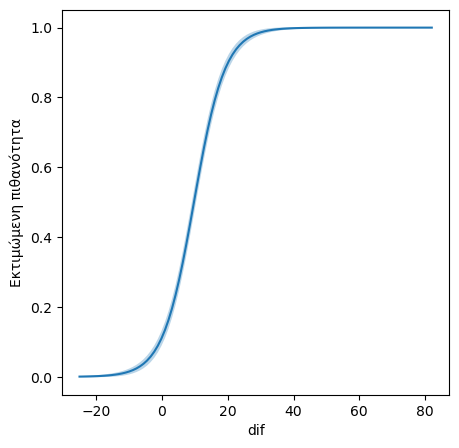

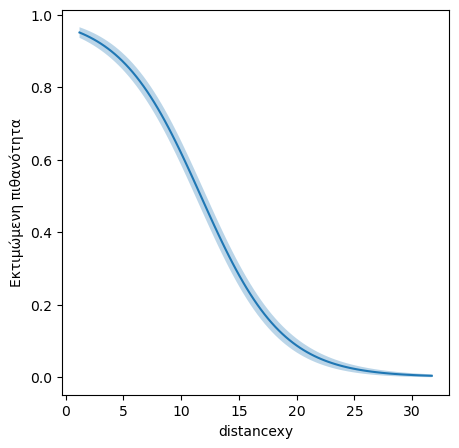

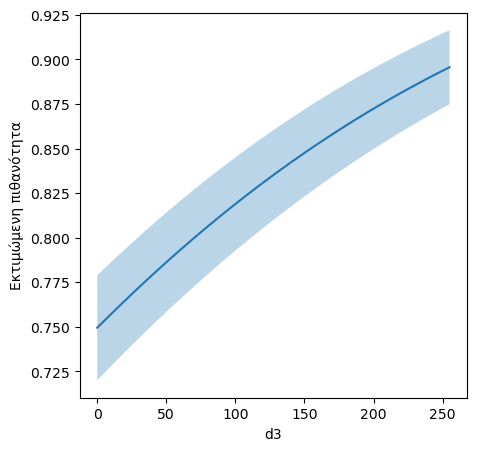

In [159]:
# Υπολογισμός των μέσων τιμών των dif, distancexy και d3
mean_dif = np.mean(data['dif'])
mean_distancexy = np.mean(data['distancexy'])
mean_d3 = np.mean(data['d3'])

# Δημιουργία ενός DataFrame με τις μέσες τιμές των dif, distancexy και d3 και ένα εύρος τιμών για την αντίστοιχη μεταβλητή
dif_range = np.linspace(data['dif'].min(), data['dif'].max(), 100)
distancexy_range = np.linspace(data['distancexy'].min(), data['distancexy'].max(), 100)
d3_range = np.linspace(data['d3'].min(), data['d3'].max(), 100)

df_new_dif = pd.DataFrame({'const': np.ones(len(dif_range)),
                           'dif': dif_range,
                           'distancexy': mean_distancexy,
                           'd3': mean_d3})

df_new_distancexy = pd.DataFrame({'const': np.ones(len(distancexy_range)),
                                  'dif': mean_dif,
                                  'distancexy': distancexy_range,
                                  'd3': mean_d3})

df_new_d3 = pd.DataFrame({'const': np.ones(len(d3_range)),
                          'dif': mean_dif,
                          'distancexy': mean_distancexy,
                          'd3': d3_range})

# Χρήση του προσαρμοσμένου μοντέλου λογιστικής παλινδρόμησης για την πρόβλεψη πιθανοτήτων για τα νέα DataFrames
predicted_probs_dif = result.predict(df_new_dif)
predicted_probs_distancexy = result.predict(df_new_distancexy)
predicted_probs_d3 = result.predict(df_new_d3)

# Υπολογισμός του κατώτερου ορίου (LL) και του ανώτερου ορίου (UL) για τις εκτιμώμενες πιθανότητες
z = 1.96  # Τιμή Z για διάστημα εμπιστοσύνης 95%
se_dif = np.sqrt(predicted_probs_dif * (1 - predicted_probs_dif) / len(data))  # Τυπικό σφάλμα για το dif
se_distancexy = np.sqrt(predicted_probs_distancexy * (1 - predicted_probs_distancexy) / len(data))  # Τυπικό σφάλμα για το distancexy
se_d3 = np.sqrt(predicted_probs_d3 * (1 - predicted_probs_d3) / len(data))  # Τυπικό σφάλμα για το d3

ll_dif = predicted_probs_dif - z * se_dif  # Κατώτερο όριο για dif
ul_dif = predicted_probs_dif + z * se_dif  # Ανώτατο όριο για dif

ll_distancexy = predicted_probs_distancexy - z * se_distancexy  # Κατώτερο όριο για distancexy
ul_distancexy = predicted_probs_distancexy + z * se_distancexy  # Ανώτατο όριο για  distancexy

ll_d3 = predicted_probs_d3 - z * se_d3  # Κατώτερο όριο για d3
ul_d3 = predicted_probs_d3 + z * se_d3  # Ανώτατο όριο για d3

# Διάγραμμα για dif
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(df_new_dif['dif'], predicted_probs_dif, label='Εκτιμώμενη πιθανότητα')
plt.fill_between(df_new_dif['dif'], ll_dif, ul_dif, alpha=0.3, label='Διάστημα εμπιστοσύνης 95%')
plt.xlabel('dif')
plt.ylabel('Εκτιμώμενη πιθανότητα')
#plt.legend()
#plt.title('Εκτιμώμενες πιθανότητες για dif με 95% διάστημα εμπιστοσύνης')
plt.show()

# Διάγραμμα για distancexy
plt.plot(df_new_distancexy['distancexy'], predicted_probs_distancexy, label='Εκτιμώμενη πιθανότητα')
plt.fill_between(df_new_distancexy['distancexy'], ll_distancexy, ul_distancexy, alpha=0.3, label='Διάστημα εμπιστοσύνης 95%')
plt.xlabel('distancexy')
plt.ylabel('Εκτιμώμενη πιθανότητα')
#plt.legend()
#plt.title('Εκτιμώμενες πιθανότητες για distanexy με 95% διάστημα εμπιστοσύνης')
plt.show()

# Διάγραμμα για d3
plt.plot(df_new_d3['d3'], predicted_probs_d3, label='Εκτιμώμενη πιθανότητα')
plt.fill_between(df_new_d3['d3'], ll_d3, ul_d3, alpha=0.3, label='Διάστημα εμπιστοσύνης 95%')
plt.xlabel('d3')
plt.ylabel('Εκτιμώμενη πιθανότητα')
#plt.legend()
#plt.title('Εκτιμώμενη πιθανότητα για d3 με 95% διάστημα εμπιστοσύνης')
plt.show()

Υπολογισμός μετρικών του προτύπου

In [141]:
# Υπολογισμός της διαφοράς στην απόκλιση μεταξύ του μηδενικού προτύπου και του τρέχοντος προτύπου
diff_deviance = null_deviance- residual_deviance
print("Διαφορά στην απόκλιση των δυο προτύπων:", diff_deviance)

# Υπολογισμός των βαθμών ελευθερίας για τη διαφορά μεταξύ των δύο μοντέλων
df_difference = df_null - df_resid
print("Βαθμοί ελευθερίας για διαφορά των μοντέλων:", df_difference)

# Υπολογισμός της τιμής p-value χρησιμοποιώντας την κατανομή chi-square
p_value = 1 - stats.chi2.cdf(diff_deviance, df_difference)
print("P-value:", p_value)

# Εκτύπωση της λογαριθμικής πιθανότητας του προτύπου
print("Λογαριθμική Πιθανότητα:", result.llf)

Διαφορά στην απόκλιση των δυο προτύπων: 555.3160716117596
Βαθμοί ελευθερίας για διαφορά των μοντέλων: 3
P-value: 0.0
Λογαριθμική Πιθανότητα: -271.14016710263667


Τα αποτελέσματα υποδεικνύουν σημαντική βελτίωση της προσαρμογής του προτύπου κατά τη σύγκριση του τρέχοντος προτύπου λογιστικής παλινδρόμησης με ένα μηδενικό μοντέλο. Η διαφορά στην απόκλιση 555,812 και η τιμή p-value 0,0 υποδηλώνουν μια εξαιρετικά σημαντική βελτίωση. Οι βαθμοί ελευθερίας για τη διαφορά είναι 4 όσες και οι ανεξάρτητες μεταβλητές. Επιπλέον, η σχετικά υψηλή λογαριθμική πιθανότητα -270,892 υποδηλώνει καλύτερη πρόβλεψη των παρατηρούμενων δεδομένων. Συνεπώς, το τρέχον πρότυπο παρέχει σημαντικά καλύτερη προσαρμογή στα δεδομένα σε σύγκριση με το μηδενικό πρότυπο.